In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#data preprocessing
#import data set

from tensorflow.keras.datasets import mnist

In [ ]:
#load the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
x_train.min() , x_train.max()

(0, 255)

In [ ]:
y_train.min(), y_train.max()

(0, 9)

In [ ]:
#normalize data set
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#check if successfully normalised dataset
x_train.min() , x_train.max()

(0.0, 1.0)

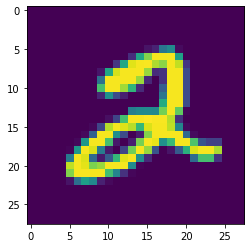

In [ ]:
plt.imshow(x_train[5])

In [ ]:
y_train[5]

2

In [ ]:
#build the LSTM
#define object initialize RNN
model = tf.keras.models.Sequential()


In [ ]:
#first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu',return_sequences=True, input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
#second LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu',))
model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
#add fully connected layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
#output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [ ]:
#compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(x_train, y_train, epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.6133 - accuracy: 0.7973 - val_loss: 0.1360 - val_accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.1643 - accuracy: 0.9564 - val_loss: 0.0952 - val_accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1175 - accuracy: 0.9691 - val_loss: 0.0842 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0870 - accuracy: 0.9773 - val_loss: 0.0570 - val_accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0738 - accuracy: 0.9806 - val_loss: 0.0746 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0636 - accuracy: 0.9832 - val_loss: 0.0505 - val_accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0539 - accuracy: 0.9855 - val_loss: 0

In [ ]:
y_pred = model.predict_classes(x_test)

In [ ]:
y_pred[0], y_test[0]

(7, 7)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 974    0    0    0    1    1    2    1    1    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   0    1 1028    1    1    0    0    0    1    0]
 [   0    0    6 1000    0    2    0    1    0    1]
 [   0    0    1    0  977    0    3    0    0    1]
 [   0    0    2    7    0  882    1    0    0    0]
 [   1    2    0    0    0    1  953    0    1    0]
 [   0    2   15    2    1    0    0 1007    0    1]
 [   0    2    2    2    3   14    6    2  941    2]
 [   2    0    0    1   16    2    0    8    4  976]]


In [ ]:
acc_score = accuracy_score(y_test, y_pred)

In [ ]:
acc_score

0.987

In [ ]:
def learning_curve (history, epoch):
  epoch_range = range( 1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.xlabel('EPOCHS')
  plt.ylabel('ACCURACY SCORES')
  plt.title("Model Accuracy")
  plt.legend(['Acc', 'Val'], loc = 'upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.xlabel('EPOCHS')
  plt.ylabel('Loss')
  plt.show()

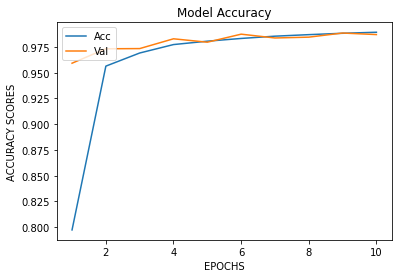

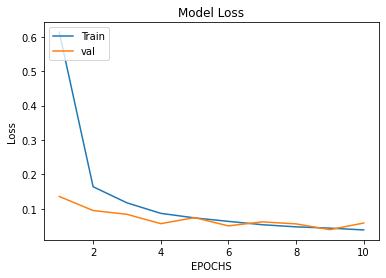

In [ ]:
learning_curve(history, 10)